# IEOR 4703 --  Monte Carlo Simulation for FE


## Gibbs Sampling on Bivariate Normal
### An example on Gibbs: high correlation delays convergence

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [ ]:
mu1 = 0.
mu2 = 0.

sig1 = 1.
sig2 = 1.

rho = 0.99

sig_diag = np.diag(np.array([sig1, sig2]))
rho_mat = np.array([[1., rho], [rho, 1.]])
Sigma = np.dot(sig_diag, np.dot(rho_mat, sig_diag))

# initial value
x1 = 0.
x2 = 0.
m = 20000
x1Array = np.zeros(m)
x2Array = np.zeros(m)

# Burn-in
b = 0

for i in range(m + b):
    # at each step, update a single component
    if i % 2 == 0:
        x1 = mu1 + rho*(sig1/sig2)*(x2 - mu2) + sig1*np.sqrt((1-rho**2))*np.random.randn()
    else:
        x2 = mu2 + rho*(sig2/sig1)*(x1 - mu1) + sig2*np.sqrt((1-rho**2))*np.random.randn()

    if i >= b:
        x1Array[i - b] = x1
        x2Array[i - b] = x2

### Traceplots

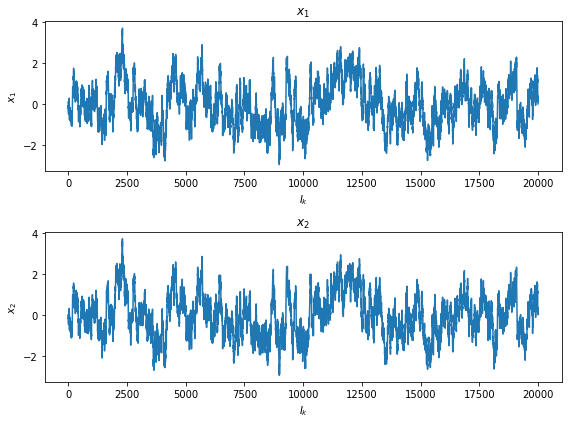

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(2, 1, 1)
plt.plot(x1Array)
plt.xlabel('$I_k$')
plt.ylabel('$x_1$')
plt.title('$x_1$')
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.plot(x2Array)
plt.xlabel('$I_k$')
plt.ylabel('$x_2$')
plt.title('$x_2$')
plt.tight_layout()

plt.show()

### Running Average

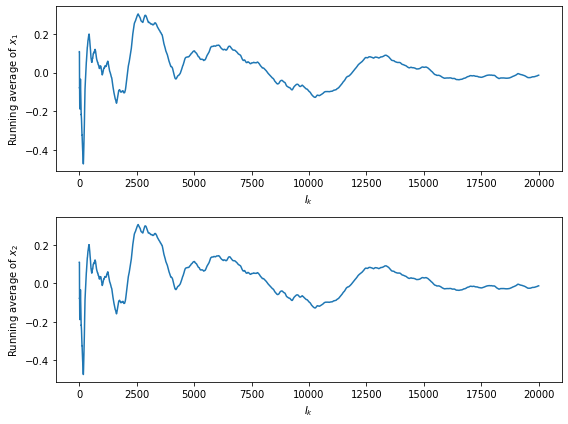

In [ ]:
x1RunningAvg = np.cumsum(x1Array) / np.arange(1, m+1)
x2RunningAvg = np.cumsum(x1Array) / np.arange(1, m+1)

plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.plot(x1RunningAvg)
plt.xlabel('$I_k$')
plt.ylabel('Running average of $x_1$')
plt.tight_layout()

plt.subplot(2,1,2)
plt.plot(x2RunningAvg)
plt.xlabel('$I_k$')
plt.ylabel('Running average of $x_2$')
plt.tight_layout()

plt.show()

### Assessment by eye-balling

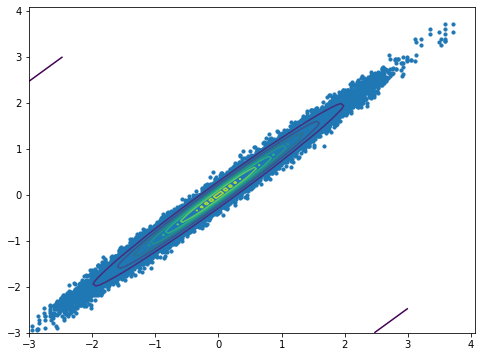

In [ ]:
plt.figure(figsize = (8, 6))
x, y = np.meshgrid(np.linspace(-3, 3, 80), np.linspace(-3, 3, 80))
pos = np.dstack((x, y))
rv = multivariate_normal(np.array([mu1, mu2]), Sigma)
plt.contour(x, y, rv.pdf(pos))
plt.scatter(x1Array, x2Array, s=10)
plt.show()